A.S. Lundervold, 25.01.24

# Audio as images

Illustrates how to use `librosa` to convert audio files to images.

> This is a quick example related to a mini project. More details were discussed in class. 

# Setup

In [1]:
from pathlib import Path
from fastcore.all import *
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import librosa

# Dataset

In [3]:
DATA = Path.home()/'data'/'DAT255'/'free-spoken-digit-dataset'/'recordings'

In [4]:
DATA.ls()

(#3002) [Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/5_nicolas_9.wav'),Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/3_yweweler_14.wav'),Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/1_lucas_5.wav'),Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/2_george_44.wav'),Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/4_yweweler_38.wav'),Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/3_yweweler_28.wav'),Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/4_yweweler_10.wav'),Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/3_george_1.wav'),Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/1_nicolas_15.wav'),Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/1_jackson_42.wav')...]

# Inspect data

In [5]:
example_audio = DATA.ls()[0]
example_audio

Path('/Users/alex/data/DAT255/free-spoken-digit-dataset/recordings/5_nicolas_9.wav')

In [6]:
def get_digit(fn):
    return fn.name[0]

In [7]:
def get_speaker(fn):
    return fn.name.split('_')[1]

In [8]:
get_digit(example_audio)

'5'

In [9]:
get_speaker(example_audio)

'nicolas'

In [10]:
y, sr = librosa.load(example_audio)

In [11]:
y

array([ 7.0906221e-04,  8.3057414e-05, -8.2842278e-04, ...,
       -6.9238096e-03, -3.7178271e-03,  0.0000000e+00], dtype=float32)

In [12]:
sr

22050

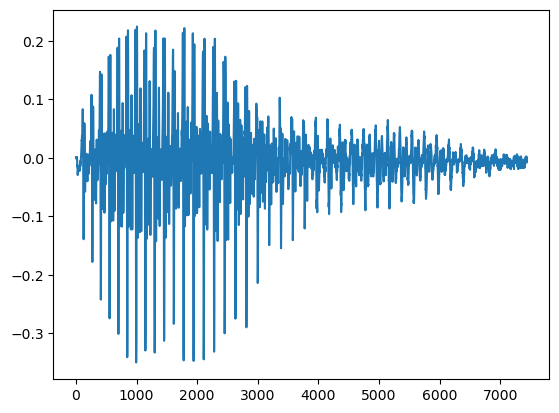

In [13]:
plt.plot(y)

In [14]:
from IPython.display import Audio, display

In [15]:
Audio(example_audio)

In [16]:
from librosa.display import waveshow

In [17]:
def plot_play_clip(audio_fn):
    a, sr = librosa.load(audio_fn)
    waveshow(a, sr=sr, color="blue")
    plt.title(f"{get_digit(audio_fn)}, {get_speaker(audio_fn)}")
    plt.show()
    display(Audio(a, rate=sr))
    return None

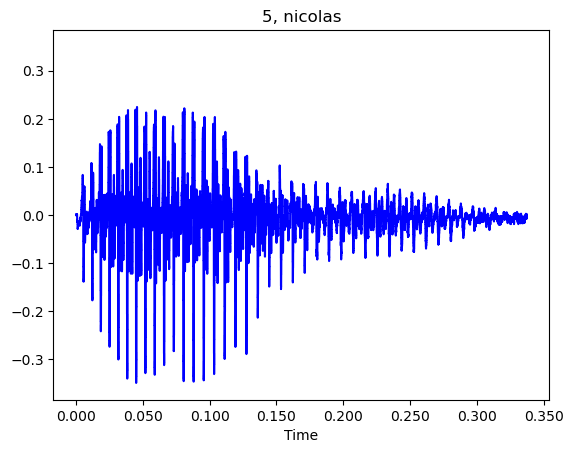

In [18]:

plot_play_clip(example_audio)

Plot a few

In [19]:
audio_files = DATA.ls()

In [20]:
import random

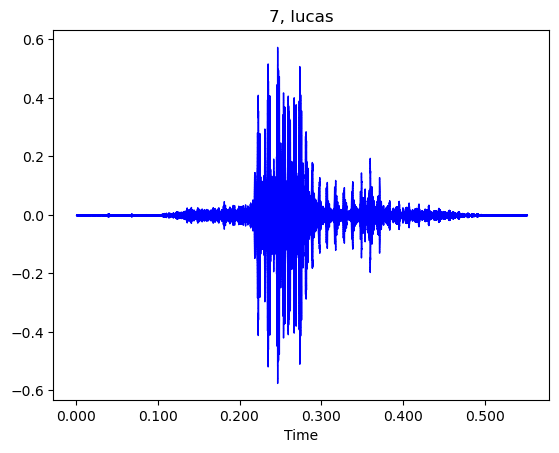

In [21]:
plot_play_clip(random.choice(audio_files))

# Create spectrograms

See the `librosa` documentation for more details: http://librosa.org/doc/0.10.1/generated/librosa.display.specshow.html#librosa.display.specshow

In [22]:
from librosa.display import specshow

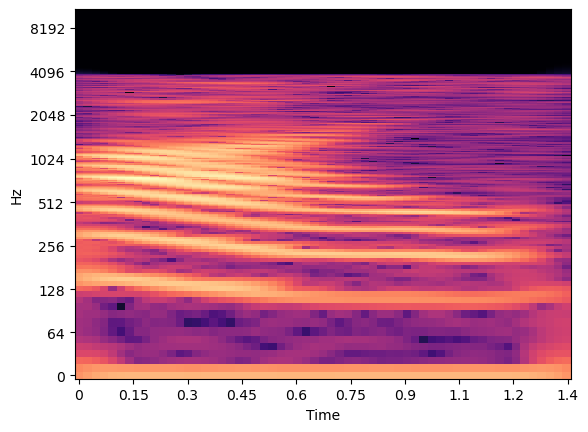

In [23]:
hop_length = 128

D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)

img = librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)

In [24]:
def get_spectrogram(fn,hop_length=128):
    y, sr = librosa.load(fn)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)
    return img

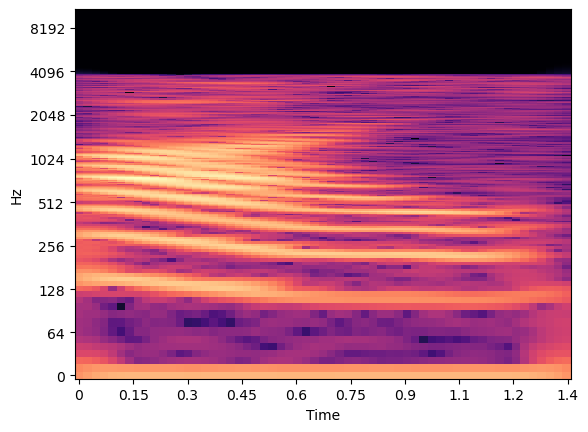

In [25]:
_ = get_spectrogram(example_audio)

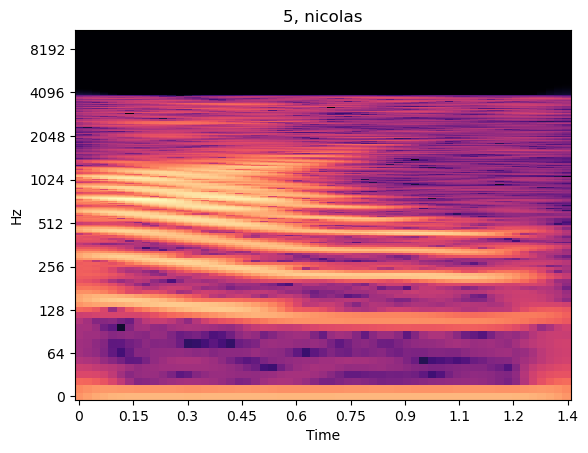

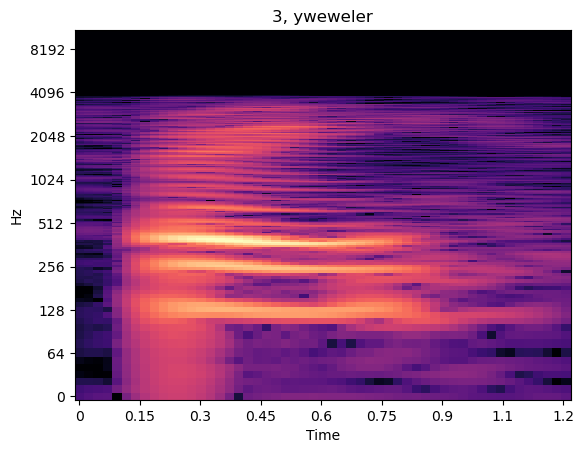

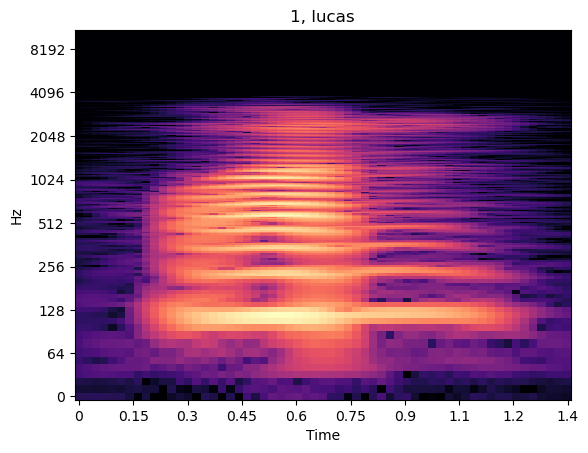

In [26]:
for fn in audio_files[:3]:
    get_spectrogram(fn)
    plt.title(f"{get_digit(fn)}, {get_speaker(fn)}")
    plt.show()

# Save the spectrograms to disk

Organize the spectrograms according to the digits spoken. 

In [27]:
# For each fn in audio_files, create a spectrogram and save it to a new folder called 
# spectrogram. Each spectrogram should have the same name as the audio file, but stored 
# in a subfolder named after the digit spoken in the audio file. 
# For example, the spectrogram for "0_jackson_0.wav" will 
# be saved to `DATA/spectrograms/0/0_jackson_0.png`
# We parallelize the process using a ThreadPoolExecutor

In [67]:
import concurrent.futures

def process_audio_file(fn):
    digit = get_digit(fn)
    spectrogram_folder = DATA/'spectrograms'/digit
    spectrogram_folder.mkdir(exist_ok=True, parents=True)
    # Save the spectrogram to a file with the same stem but a .png extension
    spectrogram_fn = spectrogram_folder/fn.with_suffix('.png').name
    if not spectrogram_fn.exists():
        img = get_spectrogram(fn)
        # Remove the axes
        plt.axis('off')
        plt.savefig(spectrogram_fn)
        plt.close()
    else:
        print(f"{spectrogram_fn} already exists")

In [69]:
# Use a ThreadPoolExecutor to parallelize the process
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(process_audio_file, audio_files)

# Using the spectrograms for audio classification

It is now straightforward to do audio classification via image classification. 

**However, this is not the best way to do it!** Much better to create an audio-specific dataloader and construct the spectrograms on the fly.

> **Your turn!** Investigate how to do this using fastai. Hint: others have done it before. See for example `fastaudio` and `fastxtend`.